<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/irrigation_type_FWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Irrigation Type from Freshwater Trust Data

In [6]:
# ------------------ #
#  Import Libraries  #
# ------------------ #
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# import irrigation and reach shapefiles
irrigation_type = gpd.read_file('/content/drive/MyDrive/Data/Mason/data_input/fwt_irrigation_runoff/mason_creek_fields/mason_creek_fields.shp')
reaches = gpd.read_file('/content/drive/MyDrive/Data/Mason/data_input/reach_shapefile/MasonReaches/MasonReaches.shp')

<ipython-input-30-de8140d20e94>:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105


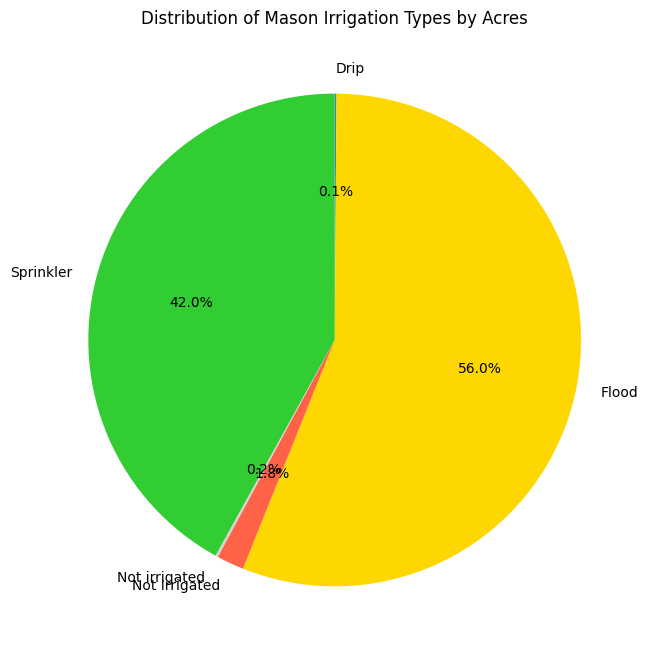

In [30]:
# ------------------------------------- #
#   Irrigation Type for All of Mason
# ------------------------------------- #

irrigation_type = gpd.read_file('/content/drive/MyDrive/Data/Mason/data_input/fwt_irrigation_runoff/mason_creek_fields/mason_creek_fields.shp')
irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105 # convert the geometry to acres, 1 square meter = 0.000247105 acres

# Group by 'irr_type' and sum the area in acres to find irrigated acres
irrigation_type_acres = irrigation_type.groupby('irr_type')['irr_acres'].sum()

# Define a custom color palette for each irrigation type
custom_palette = {
    'Not Irrigated': '#FF6347',  # Tomato Red
    'Drip': '#4682B4',     # Steel Blue
    'Sprinkler': '#32CD32', # Lime Green
    'Flood': '#FFD700'    # Gold
}

colors = [custom_palette.get(irrig_type, '#D3D3D3') for irrig_type in irrigation_type_acres.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
irrigation_type_acres.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors)
plt.gca().set_aspect('equal')
plt.title('Distribution of Mason Irrigation Types by Acres')
plt.ylabel('')
plt.show()

Irrigation types within reach Reach 4 (in acres):
    irr_type     irr_acres reach_name
0      Flood  4.396716e-09    Reach 4
1  Sprinkler  4.565832e-09    Reach 4




<ipython-input-24-33ad03b9e513>:13: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105


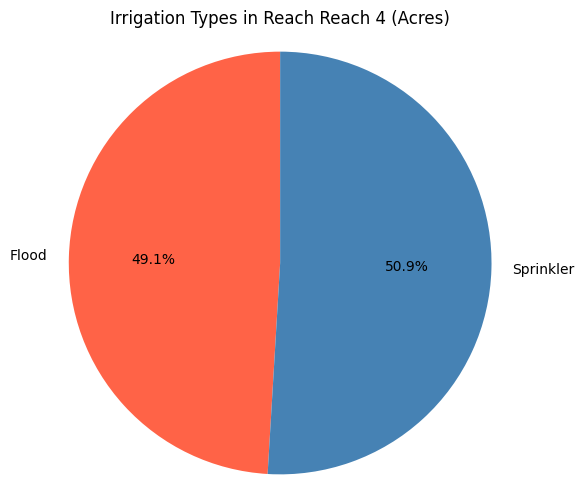

Irrigation types within reach Purdum Reach (in acres):
  irr_type     irr_acres    reach_name
0    Flood  3.707962e-08  Purdum Reach




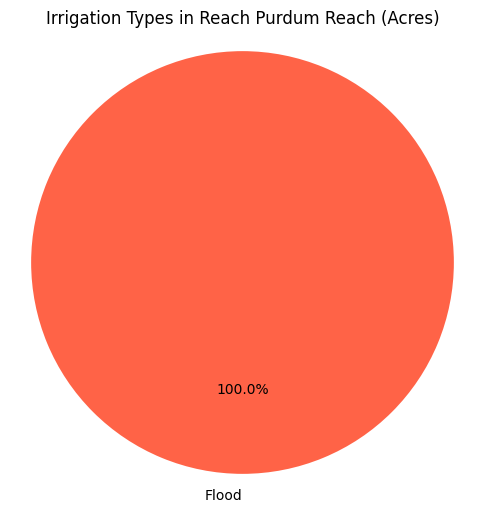

Irrigation types within reach Solomon Reach (in acres):
        irr_type     irr_acres     reach_name
0          Flood  1.931287e-08  Solomon Reach
1  Not Irrigated  1.228954e-09  Solomon Reach
2      Sprinkler  2.233682e-09  Solomon Reach




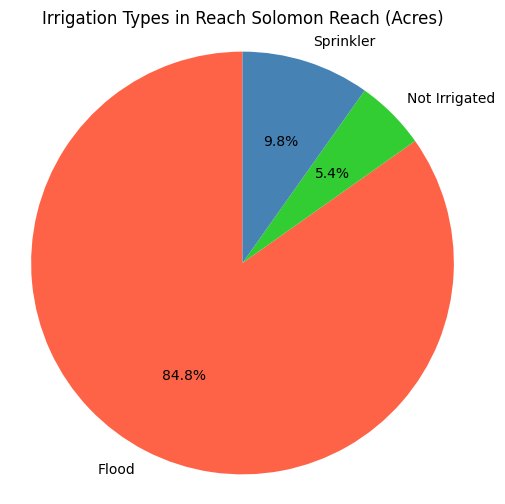

Irrigation types within reach Reach 3 (in acres):
        irr_type     irr_acres reach_name
0          Flood  6.924753e-08    Reach 3
1  Not Irrigated  2.206406e-09    Reach 3




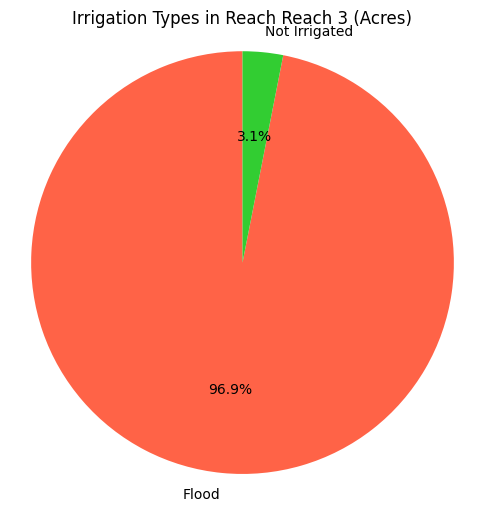

Irrigation types within reach Reach 2 (in acres):
        irr_type     irr_acres reach_name
0          Flood  3.012435e-07    Reach 2
1  Not Irrigated  4.907846e-09    Reach 2
2      Sprinkler  1.367436e-08    Reach 2




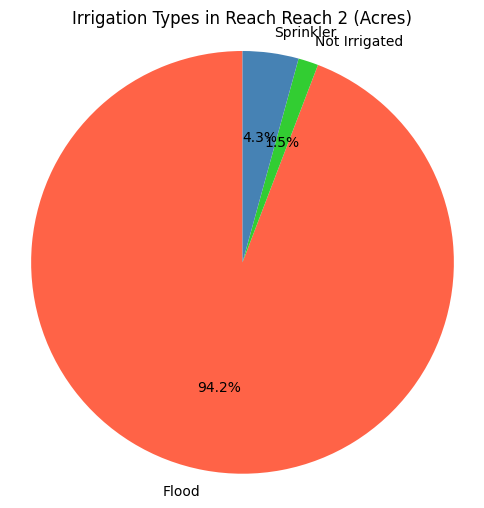

Irrigation types within reach Reach 1 (in acres):
        irr_type     irr_acres reach_name
0          Flood  5.287953e-08    Reach 1
1  Not Irrigated  2.351395e-09    Reach 1
2      Sprinkler  4.839181e-09    Reach 1




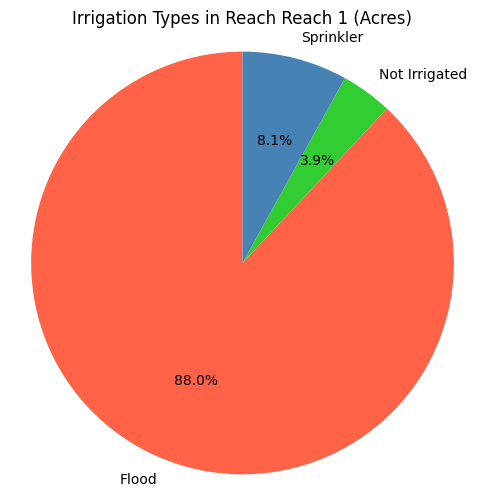

In [24]:
# ------------------------------------- #
#     Irrigation Type for each Reach
# ------------------------------------- #

name_column = 'Name'

custom_palette = {
    'Flood': '#FF6347',  # Tomato Red
    'Sprinkler': '#4682B4',  # Steel Blue
    'Not Irrigated': '#32CD32',  # Lime Green
    'Drip': '#FFD700'  # Gold
}

irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105 # convert the geometry to acres, 1 square meter = 0.000247105 acres

reach_data = []

for reach_name in reaches[name_column].unique():
    selected_reach = reaches[reaches[name_column] == reach_name]
    joined_data = gpd.sjoin(irrigation_type, selected_reach, how='inner', predicate='intersects')

    # Group by irrigation type to sum the area in acres for each reach
    irrigation_in_reach = joined_data.groupby('irr_type')['irr_acres'].sum().reset_index()
    irrigation_in_reach['reach_name'] = reach_name  # Add a column for reach_name

    reach_data.append(irrigation_in_reach)

    print(f"Irrigation types within reach {reach_name} (in acres):")
    print(irrigation_in_reach)
    print("\n")

    irrigation_types = irrigation_in_reach['irr_type']
    colors = [custom_palette.get(irrig_type, '#D3D3D3') for irrig_type in irrigation_types]

    plt.figure(figsize=(6, 6))
    plt.pie(irrigation_in_reach['irr_acres'], labels=irrigation_types, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Irrigation Types in Reach {reach_name} (Acres)')
    plt.axis('equal')
    plt.show()

#combine results into df
reach_data_df = pd.concat(reach_data, ignore_index=True)